In [26]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [27]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [28]:
dataset = MNIST(root = 'data/', download = True)

In [29]:
# checking the length of the dataset
# it has 60,000 images
# Each row is an image and consists of pixel values

len(dataset)

60000

In [30]:
# creating a test dataset

test_dataset = MNIST(root = 'data/', train = False)
len(test_dataset)

10000

In [31]:
# looking at a sample element in the dataset
# Each picture/row has pixel values of size 28 x 28
# So the total size of the dataset would be 60000 x 28 x 28

dataset[1]

(<PIL.Image.Image image mode=L size=28x28 at 0x12DD51048>, 0)

In [32]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [33]:
# viewing the image
# download matplotlib
# to indicate to jupyter that we want to plot the graphs inside the notebook. Otherwise a popup appears
# statements starting with % are called ipython magig commands. They are used to configure the behaviour of the notebook

import matplotlib.pyplot as plt
%matplotlib inline 



Label: 0


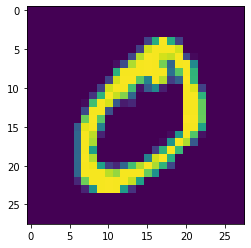

In [34]:
image, label = dataset[1]
plt.imshow(image)
print('Label:', label)

In [35]:
# Inorder for pytorch to work with these images- convert to tensors
# PyTorch datasets allow us to specify one or more transformation functions which are applied to the images as they are loaded.

import torchvision.transforms as transforms

In [36]:
dataset = MNIST(root = 'data/', train = True,
                transform = transforms.ToTensor())


In [37]:
# image will be converted to a 1 x 28 x 28 tensor
# First dimension to hold color tracks. Since data is greyscale only 1

img_tensor, label = dataset[1]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 0


Training set - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
Validation set - used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
Test set - used to compare different models, or different types of modeling approaches, and report the final accuracy of the model.


In [38]:
# n is the dataset size and val_pct is the % of it that we want to set aside for the validation set
  
import numpy as np

def split_indices(n, val_pct):
    # calculating the size of the validation set
    n_val = int(val_pct * n)
    # np.random.permutation returns an suffled array of 60,000 since n =60,000
    idxs = np.random.permutation(n)
    # Picking the first to n_val indicies/rows/images for validation set
    return idxs[n_val:], idxs[:n_val]


In [39]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [40]:
print(len(train_indices), len(val_indices))
# just to see a sample of the shiffled indices
print('Sample val indices: ', val_indices[:20])

48000 12000
Sample val indices:  [  868 40324 49111 20815  9705 48535 16058 55472 22799  8760 15131 24157
 12320 25544 14331 50157 25852 24195 34635 19171]


In [41]:
# we need to create dataloaders for the training and validation sets
# we need to enable a subset random sampler which samples elements randomly

from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [42]:
batch_size = 100

# training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size, sampler = train_sampler)

# validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batch_size, sampler = val_sampler)

Building The Model
pred = x @ w.t() + b
nn.Linear accepts vectors so tensors need to be flattened out
output will be a vector of size 10, each element giving the probability that an input belongs to the corressponding label

In [43]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

# Logistic Regression Model
model = nn.Linear(input_size, num_classes)

In [44]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0230,  0.0318, -0.0118,  ...,  0.0273,  0.0084, -0.0177],
        [ 0.0035, -0.0173, -0.0316,  ...,  0.0158, -0.0279, -0.0069],
        [-0.0058, -0.0075, -0.0054,  ...,  0.0003,  0.0330, -0.0149],
        ...,
        [ 0.0230,  0.0046, -0.0301,  ...,  0.0029,  0.0351,  0.0265],
        [ 0.0256,  0.0052, -0.0222,  ...,  0.0133,  0.0271,  0.0344],
        [ 0.0143, -0.0310,  0.0304,  ..., -0.0106,  0.0231,  0.0114]],
       requires_grad=True)

In [45]:
print(model.bias.size())
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0149,  0.0157, -0.0089, -0.0089,  0.0272, -0.0351, -0.0110, -0.0325,
        -0.0251, -0.0211], requires_grad=True)

In [48]:
# Flattening the tensors
# Inheriting from a super class nn.Module
# Forward function get called when a forward pass is made

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [49]:
# .weight and .bias attributes are now inside linear attribute so the model does not have them
# However, .parameters method of the model returns a list containing weights and biases and can also be used by a PyTorch Optimizer

print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0209, -0.0280,  0.0061,  ...,  0.0230, -0.0203, -0.0143],
         [ 0.0200,  0.0173, -0.0202,  ...,  0.0146, -0.0241, -0.0218],
         [ 0.0326,  0.0008, -0.0124,  ..., -0.0338,  0.0017, -0.0109],
         ...,
         [ 0.0305, -0.0149,  0.0239,  ..., -0.0296, -0.0185,  0.0177],
         [-0.0336, -0.0111,  0.0268,  ...,  0.0123,  0.0127,  0.0087],
         [ 0.0199,  0.0121, -0.0056,  ...,  0.0024, -0.0053, -0.0171]],
        requires_grad=True), Parameter containing:
 tensor([-0.0273,  0.0199,  0.0280, -0.0064,  0.0241, -0.0082,  0.0060, -0.0027,
          0.0215, -0.0090], requires_grad=True)]

In [50]:
for images, labels in train_loader:
    outputs = model(images)
    break
    
print('outputs.shape : ', outputs.shape)
print('sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([100, 10])
sample outputs :
 tensor([[ 0.3469,  0.0546,  0.3178, -0.1343,  0.0130,  0.0764, -0.1799,  0.2187,
          0.0752,  0.0198],
        [-0.0754,  0.1572,  0.2612, -0.1481, -0.0537,  0.1991, -0.0731,  0.2294,
         -0.1401, -0.0736]])


For each of the 100 images (batch_size in the data loader) we get 10 outputs, one for each class. We's like the outputs to represent probabilities; for the the elements need to range from 0 to 1 and all add up to 1. To do that, we use the softmax function- e^yi/Eyj. We replace each element yi in the output row with e^yi to make eachof them positive and divide by the sum of all the replacing elements.

In [51]:
# The softmax function is included in the torch.nn.functional package and requires a dimension along which softmax is to be calculated 

import torch.nn.functional as F

In [52]:
# Dim = 1 is the y-axis. Shape of outputs in 100 x 10. 
# Applying softmax along the y-axis will ensure that every slice along the direction of y will equal 1

# Applying softmax to each output row
probs = F.softmax(outputs, dim = 1)

# Looking at sample probabilities
print("sample probabilities:\n", probs[:2].data)

# Adding the probabilities of an output row
# item() to get a python number from a tensor containing a single element
print("sum: ", torch.sum(probs[0]).item())


sample probabilities:
 tensor([[0.1287, 0.0961, 0.1250, 0.0796, 0.0922, 0.0982, 0.0760, 0.1132, 0.0981,
         0.0928],
        [0.0891, 0.1124, 0.1247, 0.0828, 0.0910, 0.1172, 0.0893, 0.1208, 0.0835,
         0.0892]])
sum:  1.0


we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. This is done using torch.max, which returns the largest element and the index of the largest element along a particular dimension of a tensor.

In [53]:
max_probs, preds = torch.max(probs, dim = 1)
print(preds)

tensor([0, 2, 7, 7, 7, 7, 9, 9, 9, 9, 7, 7, 2, 0, 4, 6, 7, 8, 7, 3, 0, 8, 7, 7,
        7, 7, 7, 0, 2, 8, 5, 4, 8, 8, 7, 0, 2, 7, 8, 2, 2, 7, 7, 8, 7, 7, 7, 7,
        7, 7, 9, 3, 7, 0, 0, 6, 7, 7, 8, 9, 7, 5, 0, 2, 7, 0, 8, 7, 6, 5, 8, 7,
        7, 7, 7, 9, 7, 2, 7, 0, 0, 0, 8, 2, 9, 2, 2, 2, 0, 9, 7, 7, 8, 6, 2, 8,
        2, 7, 7, 4])


In [54]:
# comparing them with the actual outputs/labels
labels

tensor([7, 5, 4, 9, 0, 5, 4, 0, 0, 7, 1, 1, 6, 7, 4, 8, 4, 9, 3, 0, 3, 1, 1, 6,
        0, 7, 8, 9, 9, 2, 8, 4, 8, 6, 9, 3, 8, 5, 3, 6, 9, 8, 0, 4, 3, 5, 0, 5,
        1, 5, 3, 0, 2, 9, 5, 3, 5, 3, 4, 4, 8, 1, 0, 0, 4, 9, 5, 7, 3, 2, 6, 2,
        1, 9, 4, 5, 2, 2, 1, 0, 4, 4, 6, 4, 6, 9, 6, 2, 3, 7, 1, 3, 4, 2, 0, 4,
        8, 7, 7, 7])

In [55]:
# the predicted and actual labels are completely different because of random weight initialization.
# we need to no train the model and adjust the weights using gradient descent

Evaluation Metric and Loss Function

Just as with linear regression, we need a way to evaluate how well our model is 
performing. A natural way to do this would be to find the percentage of labels 
that were predicted correctly i.e. the accuracy of the predictions.

In [56]:
def accuracy(l1, l2):
    return torch.sum(l1 == l2).item() / len(l1)

The == performs an element-wise comparison of two tensors with the same shape, and returns a tensor of the same shape, containing 0s for unequal elements, and 1s for equal elements. Passing the result to torch.sum returns the number of labels that were predicted correctly. Finally, we divide by the total number of images to get the accuracy.

Let's calculate the accuracy of the current model, on the first batch of data. Obviously, we expect it to be pretty bad.



In [57]:
accuracy(preds, labels)

0.11

While the accuracy is a great way for us (humans) to evaluate the model, it can't be used as a loss function for optimizing our model using gradient descent, for the following reasons:

It's not a differentiable function. torch.max and == are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.

It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements.

Due to these reasons, accuracy is a great evaluation metric for classification, but not a good loss function. A commonly used loss function for classification problems is the cross entropy, which has the following formula:

cross-entropy

While it looks complicated, it's actually quite simple:

For each output row, pick the predicted probability for the correct label. E.g. if the predicted probabilities for an image are [0.1, 0.3, 0.2, ...] and the correct label is 1, we pick the corresponding element 0.3 and ignore the rest.

Then, take the logarithm of the picked probability. If the probability is high i.e. close to 1, then its logarithm is a very small negative value, close to 0. And if the probability is low (close to 0), then the logarithm is a very large negative value. We also multiply the result by -1, which results is a large postive value of the loss for poor predictions.

Finally, take the average of the cross entropy across all the output rows to get the overall loss for a batch of data.

Unlike accuracy, cross-entropy is a continuous and differentiable function that also provides good feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). This makes it a good choice for the loss function.

As you might expect, PyTorch provides an efficient and tensor-friendly implementation of cross entropy as part of the torch.nn.functional package. Moreover, it also performs softmax internally, so we can directly pass in the outputs of the model without converting them into probabilities.

In [58]:
loss_fn = F.cross_entropy

In [59]:
# Loss for the current batch of data

loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3046, grad_fn=<NllLossBackward>)


Since the cross entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples, one way to interpret the resulting number e.g. 2.23 is look at e^-2.23 which is around 0.1 as the predicted probability of the correct label, on average. Lower the loss, better the model.

Optimizer

use the optim.SGD optimizer to update the weights and biases during training, but with a higher learning rate of 1e-3

In [60]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Training the model


Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model. The training process is almost identical to linear regression. However, we'll augment the fit function we defined earlier to evaluate the model's accuracy and loss using the validation set at the end of every epoch.

We begin by defining a function loss_batch which:

calculates the loss for a batch of data
optionally perform the gradient descent update step if an optimizer is provided
optionally computes a metric (e.g. accuracy) using the predictions and actual targets

In [61]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    # Calculate loss
    preds = model(xb)
    loss = loss_func(preds, yb)
                     
    if opt is not None:
        # Compute gradients
        loss.backward()
        # Update parameters             
        opt.step()
        # Reset gradients
        opt.zero_grad()
    
    metric_result = None
    if metric is not None:
        # Compute the metric
        metric_result = metric(preds, yb)
    
    return loss.item(), len(xb), metric_result

The optimizer is an optional argument, to ensure that we can reuse loss_batch for computing the loss on the validation set. We also return the length of the batch as part of the result, as it'll be useful while combining the losses/metrics for the entire dataset.

Next we define an evaluate function, which calculates the overall loss (and a metric, if provided) for the validation set.

In [62]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        # Pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                   for xb,yb in valid_dl]
        # Separate losses, counts and metrics
        losses, nums, metrics = zip(*results)
        # Total size of the dataset
        total = np.sum(nums)
        # Avg. loss across batches 
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            # Avg. of metric across batches
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric

If it's not immediately clear what this function does, try executing each statement in a separate cell, and look the results. We also need to redefine the accuracy to operate on an entire batch of outputs directly, so that we can use it as a metric in fit.

In [63]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

Note that we don't need to apply softmax to the outputs, since it doesn't change the relative order of the results. This is because e^x is an increasing function i.e. if y1 > y2, then e^y1 > e^y2 and the same holds true after averaging out the values to get the softmax.

Let's see how the model performs on the validation set with the initial set of weights and biases.

In [64]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.2878, Accuracy: 0.1180


The initial accuracy is below 10%, which is what one might expect from a randomly intialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly). Also note that we are using the .format method with the message string to print only the first four digits after the decimal point.

We can now define the fit function quite easily using loss_batch and evaluate.

In [65]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    for epoch in range(epochs):
        # Training
        for xb,yb in train_dl:
            loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)

        # Evaluation
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        # Print progress
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'
                  .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

In [66]:
# Redifine model and optimizer
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [67]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.8644, accuracy: 0.6578
Epoch [2/5], Loss: 1.5703, accuracy: 0.7539
Epoch [3/5], Loss: 1.3644, accuracy: 0.7807
Epoch [4/5], Loss: 1.2164, accuracy: 0.7965
Epoch [5/5], Loss: 1.1066, accuracy: 0.8089


In [68]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.0224, accuracy: 0.8163
Epoch [2/5], Loss: 0.9561, accuracy: 0.8207
Epoch [3/5], Loss: 0.9024, accuracy: 0.8261
Epoch [4/5], Loss: 0.8582, accuracy: 0.8300
Epoch [5/5], Loss: 0.8210, accuracy: 0.8341


In [69]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.7893, accuracy: 0.8375
Epoch [2/5], Loss: 0.7619, accuracy: 0.8405
Epoch [3/5], Loss: 0.7380, accuracy: 0.8436
Epoch [4/5], Loss: 0.7168, accuracy: 0.8463
Epoch [5/5], Loss: 0.6981, accuracy: 0.8495


In [70]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.6812, accuracy: 0.8509
Epoch [2/5], Loss: 0.6661, accuracy: 0.8527
Epoch [3/5], Loss: 0.6523, accuracy: 0.8543
Epoch [4/5], Loss: 0.6397, accuracy: 0.8558
Epoch [5/5], Loss: 0.6282, accuracy: 0.8572


In [ ]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)